In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import DDPG
from stable_baselines3.common.env_checker import check_env

import matplotlib.pyplot as plt

sys.path.append('..')

import MazeEnv.MultiTargetMazeEnv as mtmz
from MazeEnv.MazeEnv import Rewards
from Utils import make_circular_map, clear_files
from Evaluation import EvalAndSaveCallback
import Evaluation

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [14]:
TOTAL_TIME_STEPS = 1000 #number of training timesteps
TIMEOUT_STEPS = 200 # Timeout Steps of each episode
BUFFER_SIZE = 1000 # smaller buffer for small task
LEARNING_RATE = 0.001

REWARDS = Rewards(target_arrival=10, collision=-10, timeout=-10, idle=-0.01)

EVAL_EPISODES=10
EVAL_FREQ=200
VIDEO_FREQ=4

In [18]:
# create environment :
tile_size = 0.1
maze_size = mz.MazeSize.SQUARE10
map_size = np.dot(maze_size, int(1 / tile_size))
maze_map = make_circular_map(map_size, 4 / tile_size)
# maze_map = np.zeros(map_size)

start_loc = (5, 5)
targets = np.genfromtxt("TestTargets/test_coords.csv", delimiter=',')

maze_env = mtmz.MultiTargetMazeEnv(maze_size=maze_size,
                                   maze_map=maze_map,
                                   tile_size=tile_size,
                                   start_loc=start_loc,
                                   target_loc_list=targets,
                                   timeout_steps=TIMEOUT_STEPS,
                                   show_gui=False,
                                   rewards=REWARDS)
maze_env = Monitor(maze_env, filename="logs/MultiTargets/results")

check_env(maze_env)

# create separete evaluation environment:
eval_maze_env =mtmz.MultiTargetMazeEnv(maze_size=maze_size,
                                       maze_map=maze_map,
                                       tile_size=tile_size,
                                       start_loc=start_loc,
                                       target_loc_list=targets,
                                       timeout_steps=TIMEOUT_STEPS,
                                       show_gui=False,
                                       rewards=REWARDS)
_ = eval_maze_env.reset()
 
# create model:
model = DDPG(policy="MlpPolicy",
             env=maze_env,
             buffer_size=BUFFER_SIZE,
             learning_rate=LEARNING_RATE,
             device=device,
             train_freq=(1, "episode"),
             verbose=1)

# create callback for evaluation
callback = EvalAndSaveCallback(log_dir="logs/MultiTargets",
                               eval_env=eval_maze_env,
                               eval_freq=EVAL_FREQ,
                               eval_episodes=EVAL_EPISODES,
                               eval_video_freq=VIDEO_FREQ,
                               verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [20]:
start = time.time()

#clean all movies from the previous run
clear_files('logs/MultiTargets/*_steps.avi')

torch.manual_seed(3295)
model.learn(total_timesteps=TOTAL_TIME_STEPS,
            callback=callback)
 
print("time", time.time() - start)

c:\study\projecta\robomaze\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


200 Steps evaluation, avg reward:-11.989999955520034, avg episode length: 200.0
rewards: [-11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034]
episode lengths: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
--Saving new best model--
400 Steps evaluation, avg reward:-11.989999955520034, avg episode length: 200.0
rewards: [-11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034]
episode lengths: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
600 Steps evaluation, avg reward:-11.989999955520034, avg episode length: 200.0
rewards: [-11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -11.989999955520034, -

Wrapping the env in a DummyVecEnv.
Reward: -11.990000000000002


NameError: name 'os' is not defined

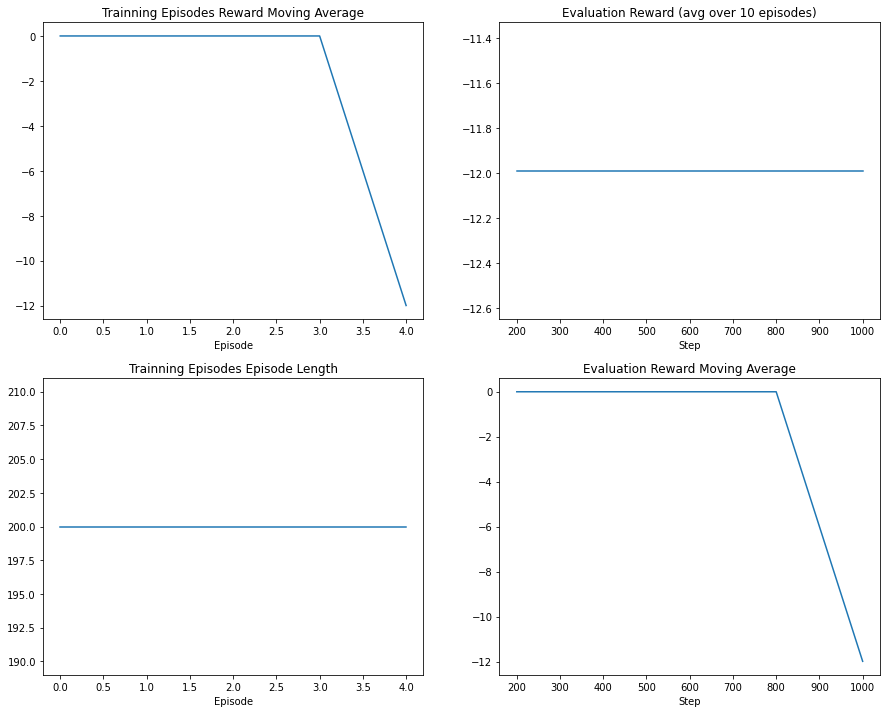

In [21]:
from IPython.display import Image
import ipyplot
import glob

# load & Evaluates the best model 
best_model = DDPG.load("./logs/MultiTargets/best_model",env=maze_env)
Evaluation.plot_train_eval_results("logs/MultiTargets", EVAL_EPISODES)

episode_reward = Evaluation.record_model(best_model, eval_maze_env, "logs/MultiTargets/final.avi")
print("Reward:", episode_reward)

Evaluation.create_gifs_from_avi("logs/MultiTargets")

#Clean previous gifs
clear_files('logs/MultiTargets/*_steps.gif')

# Plot gifs
gifs = glob.glob("logs/MultiTargets/*.gif")
labels = [pth.split('/')[-1].split('.')[0] for pth in gifs]
ipyplot.plot_images(gifs, labels, img_width=250)
